In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
%matplotlib inline

In [2]:
iris = load_iris()
x = iris.data
y = iris.target
x_names = iris.feature_names
y_names = iris.target_names

In [3]:
tree_classifier = DecisionTreeClassifier(max_depth=4)
tree_classifier.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

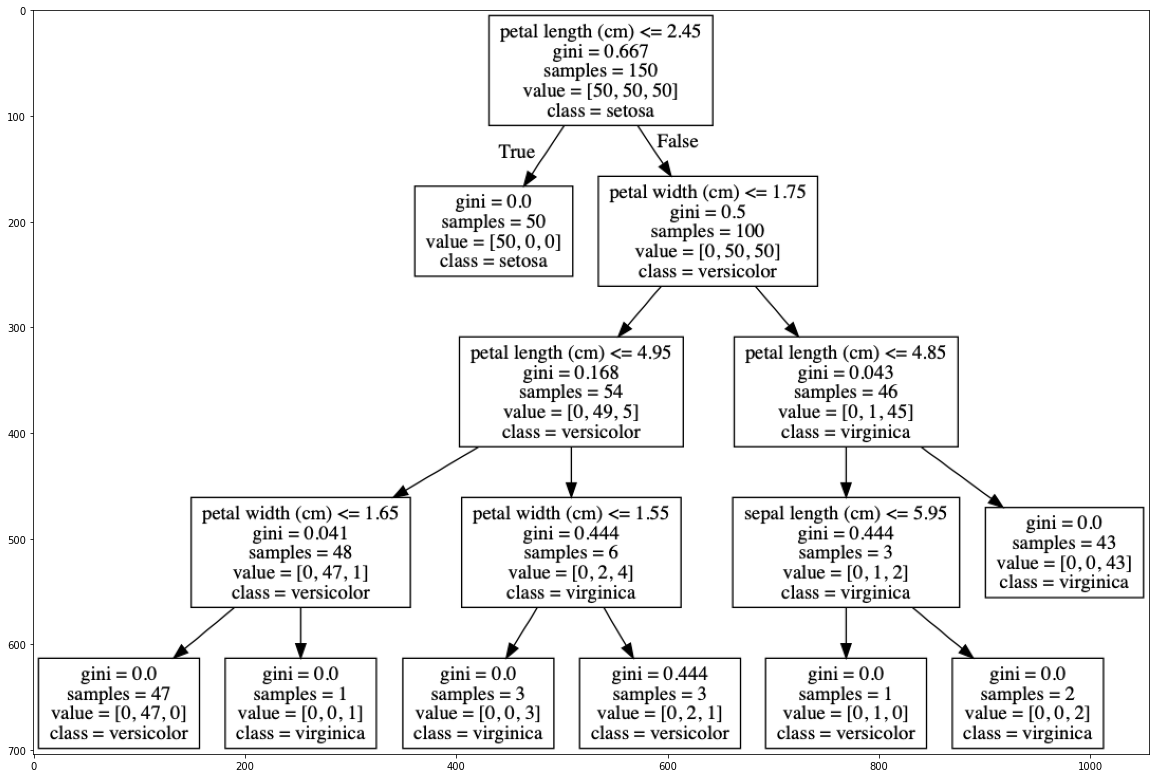

In [4]:
export_graphviz(tree_classifier, 'classifier.dot', feature_names=x_names, class_names=y_names)
! dot -Tpng classifier.dot -o classifier.png
img = cv.imread('classifier.png')
plt.figure(figsize = (20,20))
plt.imshow(img)
plt.show()

In [5]:
def get_class_for_node(y):
    return np.argmax(np.bincount(y))

In [6]:
print('Class for root node --> {}'.format(y_names[get_class_for_node(y)]))

Class for root node --> setosa


In [7]:
def split_node(x, y, feature, threshold):
    x_l=[]
    y_l=[]
    x_r=[]
    y_r=[]
    for feature_set, classification in zip(x,y):
        if feature_set[feature] > threshold:
            x_r.append(feature_set)
            y_r.append(classification)
        else:
            x_l.append(feature_set)
            y_l.append(classification)
    return np.asarray(x_l), np.asarray(y_l, dtype=np.int64), np.asarray(x_r), np.asarray(y_r, dtype=np.int64)

def gini_impurity(y):
    instances = np.bincount(y)
    total = np.sum(instances)
    p = instances/total
    return 1.0 - np.sum( np.power(p,2) )

def entropy_impurity(y):
    instances = np.bincount(y)
    total = np.sum(instances)
    p = instances/total
    return 0.0 - np.sum( np.log(p)*p )

def get_score_for_split(y, y_l, y_r, impurity_measure):
    left_score = impurity_measure(y_l)*y_l.shape[0]/y.shape[0]
    right_score = impurity_measure(y_r)*y_r.shape[0]/y.shape[0]
    return left_score + right_score

def cart_split(x, y, granulation, impurity_measure):
    x_l_best= y_l_best =  x_r_best = y_r_best=None
    score_best = feature_best= threshold_best=None
    for feature in range(x.shape[1]):
        start = np.min(x[:,feature])
        end = np.max(x[:,feature])
        step = (end-start)/granulation
        for threshold in np.arange(start, end, step):
            x_l, y_l, x_r, y_r = split_node(x,y,feature,threshold)
            score = get_score_for_split(y,y_l,y_r,impurity_measure)
            if score_best is None or score_best > score:
                x_l_best=x_l
                y_l_best=y_l
                x_r_best=x_r
                y_r_best=y_r
                score_best=score
                feature_best=feature
                threshold_best=threshold
    return x_l_best, y_l_best, x_r_best, y_r_best, score_best, feature_best, threshold_best

In [8]:
x_l, y_l, x_r, y_r, score, feature, threshold = cart_split(x,y,10,gini_impurity)

In [9]:
print('Gini impurity of parent node --> {:.3f}'.format(gini_impurity(y)))
print('Gini impurity of left node --> {:.3f}'.format(gini_impurity(y_l)))
print('Gini impurity of right node --> {:.3f}'.format(gini_impurity(y_r)))
print('Score --> {:.3f}'.format(score))
print('Feature --> {}'.format(x_names[feature]))
print('Threshold --> {:.3f}'.format(threshold))
print('Class of parent node --> {}'.format(y_names[get_class_for_node(y)]))
print('Class of left node --> {}'.format(y_names[get_class_for_node(y_l)]))
print('Class of right node --> {}'.format(y_names[get_class_for_node(y_r)]))

Gini impurity of parent node --> 0.667
Gini impurity of left node --> 0.000
Gini impurity of right node --> 0.500
Score --> 0.333
Feature --> petal length (cm)
Threshold --> 2.180
Class of parent node --> setosa
Class of left node --> setosa
Class of right node --> versicolor
